## K-mean Clustering

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
import pandas as pd
import numpy as np
import glob
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS 
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.tokenize import sent_tokenize
df = pd.read_csv("Reviews.csv")
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlatl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dlatl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlatl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:


words = df['Text'].to_string()

#tokenized_words=word_tokenize(text_lower)

# lemmatizing words based on contexts and usage of words in sentences
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]


# Removing punctuations, which contain '?', '' and '!'
punctuations= dict((ord(punctuation), None) for punctuation in string.punctuation)


#filtered_tokens_final=[]
#for i in filtered_tokens:
    #if i not in punctuations:
        #filtered_tokens_final.append(i)

def filtered_token_final(text):
  text_lower = text.lower().translate(punctuations) # converting text into lower case and removing punctuations
  tokenized_words=word_tokenize(text_lower) # tokenizing words
  return LemTokens(tokenized_words) # Lemmatizing tokenzied words

tfidf_vectorizer = TfidfVectorizer(stop_words='english' , ngram_range=(1,2), 
                             tokenizer = filtered_token_final, min_df=0.05, max_df=0.85)

# TfidfVectorizer
feature_vect = tfidf_vectorizer.fit_transform(df['Text'])

c:\Users\dlatl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\dlatl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [5]:
from sklearn.cluster import KMeans

# will split data into three clusters.
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

# cluster label and centers 
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# Add 'cluster_label' column
df['cluster_label'] = cluster_label
df.sample(5)

c:\Users\dlatl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label
560860,560861,B0018CFMZW,A1N2NG5FTVX7ZX,"D. M. Smith ""just me""",0,0,5,1324080000,only dog food my chihuahua can eat,My chihuahua is finicky eater with Inflammator...,2
226721,226722,B002GWH6XY,AJCAVTHZFM0J3,"G. Eguia ""gaber""",1,1,4,1331251200,Tasty and at a Great Price for Loose Leaf Tea!,i can drink this medium bodied green tea for a...,0
303273,303274,B0002DGRZC,A26LQTZXVRIH87,Alex C,0,0,5,1335398400,My snobby hound loves these,"My beagle/lab mix is fairly picky with treats,...",2
178744,178745,B0014EOU5W,A1PF75GNJL8FAM,samantharoxann,7,8,5,1292976000,Mmm...half the crabs.,What a great Product Description! V8 Spicy Ho...,2
411896,411897,B000CQC05U,A1DRBXM7FYICYV,"Craig Rizzi ""Craig R.""",1,1,5,1220918400,great peach flavored black tea,"As a previous reviewer stated,this tea is a wo...",0


In [11]:
df[df['cluster_label']==0].sort_values(by='Text')[:5]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label,Helpfulness
126462,126463,B004569PAG,A3LHF3RUAS4WLC,Leonid,1,1,5,1329868800,unique and robust,"""...smoothly blends the high notes of a high g...",0,1.000000
333019,333020,B0000CFXYA,A1S6LV2XO6EN3B,"KuddlKat ""Techie""",1,2,2,1277769600,"""Tins"" means Tins, not envelopes","""6 Tins"" arrived as 1 tin wrapped in paper and...",0,0.500000
540656,540657,B001D0GV90,A33RONBC0EU0A2,Pete Zar,2,3,5,1289433600,For Real Coffee Lovers Only,"""DO NOT BUY THIS ITEM""... UNLESS...... you can...",0,0.666667
52225,52226,B001QY27AU,A2B8GXSCB1R05T,Zack Davisson,4,6,1,1266796800,A marketing fad does not make for a nice tea,"""Green Tea with Pomegranate and Acai"" seems mo...",0,0.666667
469461,469462,B000GG1O9O,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",3,3,3,1318291200,Mild Lemon Flavor,"""I Love Lemon"" is a good base for a lemon tea....",0,1.000000


The first cluster is mainly associated with reviews about tea businesses. 

In [12]:
df[df['cluster_label']==1].sort_values(by='Text')[:5]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label,Helpfulness
354033,354034,B001A4B8EM,APQ50DQHSNYFR,Ryan Kirk,79,79,1,1283644800,Amazon should be ashamed to even carry this.,"""2% Kopi Luwak"" That's the key part in the de...",1,1.0
440232,440233,B005ZBZLSU,A2QTB6RFY12WGQ,Tuseline Goldstein,1,2,5,1323648000,Looooove It!,"""By far the best cup of coffee ever!!!"". I rec...",1,0.5
82988,82989,B007TGDXNO,A2QTB6RFY12WGQ,Tuseline Goldstein,1,2,5,1323648000,Looooove It!,"""By far the best cup of coffee ever!!!"". I rec...",1,0.5
124338,124339,B005ZBZM52,A2QTB6RFY12WGQ,Tuseline Goldstein,2,2,5,1323648000,Organic never tasted better!,"""By far the best cup of coffee ever!!!"". I rec...",1,1.0
92370,92371,B007TGDXMK,A2QTB6RFY12WGQ,Tuseline Goldstein,2,2,5,1323648000,Organic never tasted better!,"""By far the best cup of coffee ever!!!"". I rec...",1,1.0


The second cluster may be associated with coffee businesses. 

In [13]:
df[df['cluster_label']==2].sort_values(by='Text')[:5]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label,Helpfulness
366022,366023,B0053TENTW,A3JG5OT0Z5Q1KE,Royal,2,2,1,1325894400,!!! FALSE ADVERTISEMENT !!!,!!! PRODUCT HAS NOTHING TO DO WITH MARVEL!!! F...,2,1.000000
240425,240426,B001VJ0B0I,A1I6U5AQAT3ZG9,"E. B. MULLIGAN ""Bronwyn""",1,3,3,1342828800,Garlic oil? I thought Garlic was bad for dogs ...,!!!<br />Animal digest? She does that on her o...,2,0.333333
502792,502793,B000V9ANUW,ALSAOZ1V546VT,"A Research It Maven ""Just the facts please""",1,1,5,1256688000,TWO big candy bars in EACH Package!,"!!HEY, these are BIG! There are actually two c...",2,1.000000
386401,386402,B002UQBL9Q,A35PQDX1R6IG9E,Lost In The Cosmos,4,5,3,1330905600,There's a reason the description doesn't list ...,""" WITH "" ... Olive Oil. What does this mean...",2,0.800000
534756,534757,B001BCOZ9S,AUV4KCE3RWIWH,"Zilbanne ""Zilbanne""",1,1,5,1328313600,My Puppy loves it,""" Hadley "" My 12 week Australian Shepherd pup ...",2,1.000000


Lastly, third cluster is associated with reviews for foods. 

In [7]:
df['Helpfulness'] = df['HelpfulnessNumerator']/df['HelpfulnessDenominator']

In [8]:
df.dropna(how='any', subset=['Helpfulness'], inplace=True)

In [9]:
df['kmeans'] = km_cluster.predict(feature_vect)

ValueError: Length of values (568454) does not match length of index (298402)

In [ ]:
df_cluster0 = df[df['cluster_label']==0].reset_index()
df_cluster0

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label,Helpfulness,kmeans
0,111,112,B0037LW78C,A3VEYLW2KPZNGK,G. Simmons,3,3,5,1297814400,Delicious tea,I have been drinking this tea for a long time ...,0,1.000000,0
1,112,113,B0037LW78C,A2F65U0UDY7TAW,Aldo,2,2,5,1337990400,My every day green tea,I have been drinking Royal King 100% Natural O...,0,1.000000,0
2,113,114,B0037LW78C,AWNANZ5VUO7IB,John D. Zuccarino,1,1,5,1308960000,the best tea ever... freah bright clean,this has to be one of the best teas I have eve...,0,1.000000,0
3,218,219,B001EO5ZMO,AW497M5SEXAPQ,Neal Pollack,5,5,5,1266105600,Ahmad Loose Imperial Blend Tea is great for th...,A friend who'd been drinking tea for 80 of his...,0,1.000000,0
4,219,220,B001EO5ZMO,A3KQ1480MHXXCW,M'ville,3,3,5,1272412800,Nice tea,"I love strong, full bodied quality tea and typ...",0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,568369,568370,B000LKVRQA,A2ZX818P92CM7F,"Gregg Somers ""chillerdad""",1,2,3,1282694400,This is Earl Grey!???,"An admitted fan of Stash Earl Grey, neverthele...",0,0.500000,0
23405,568389,568390,B001EQ5O6Y,A2LGOMSYQJ5PZS,N. Hjort,2,2,5,1257552000,great flavor,The cinnamon honey sticks flavor was excellent...,0,1.000000,0
23406,568390,568391,B001EQ5O6Y,A3HRWZW3ZK6W49,Kristen McDaniel,1,1,5,1239148800,Yummy honey in a convenient portion.,I bought this in an effort to help myself quit...,0,1.000000,0
23407,568402,568403,B001EQ5O6Y,A1A3H22VVZYUKW,msfreixy,1,3,1,1187049600,alternative sweetner,"I was disappointed in this product, as I had r...",0,0.333333,0


In [82]:
df_cluster1 = df[df['cluster_label']==1].reset_index()
df_cluster1

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label,Helpfulness,kmeans
0,54,55,B002GWHC0G,A1ND7WC5LXOU48,"David Belton ""Proteus 1""",2,2,4,1322438400,Roasts up a smooth brew,I roast at home with a stove-top popcorn poppe...,1,1.000000,1
1,171,172,B001IUKD76,A2KVCXTQVN18KI,"A. Martin ""tony_fourbu""",3,3,5,1283299200,Ricore forever,I have drunk Ricore since my mother allowed be...,1,1.000000,1
2,188,189,B004V6AH34,ATX44LVZL5JFV,Silvy,1,1,4,1314403200,not bad for instant healthy coffee,I bought this coffee because its much cheaper ...,1,1.000000,1
3,254,255,B0048IC328,A1W867A8DSHFHC,no name,1,3,1,1339804800,Don't Waste Your Money,"I felt energized within five minutes, but it l...",1,0.333333,1
4,293,294,B001UJEN6C,A2VBZOK3SVSDWA,Jennifer Gray,3,3,5,1294790400,Way better than Guayaki!,I had tried both of the Guayaki energy shots a...,1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27116,568267,568268,B00374ZKQ0,A22UP57PZNGP3A,"B. P. ""coffee lover""",0,1,2,1326153600,Not for me,Tried this for the first time and had to dump ...,1,0.000000,1
27117,568269,568270,B00374ZKQ0,A2HNJUYJQA8D5M,"R. Godale ""RAG""",2,5,1,1294704000,Horrible Taste,Tried this exact brand of Stevia today and I h...,1,0.400000,1
27118,568325,568326,B001ELL54Y,AYIT1EFS9SVTD,Elizabeth A. Keep,3,3,5,1232668800,Highly enjoyable cup of coffee,Just ordered our second set of this coffee and...,1,1.000000,1
27119,568330,568331,B001ELL54Y,A3VQ54EZ30PNO5,"J. Gonzalez ""Papa""",0,1,5,1295827200,Jamaican Panama Blue,Ordered coffee for a few months. Now I would n...,1,0.000000,1


In [15]:
df_cluster2 = df[df['cluster_label']==2].reset_index()
df_cluster2

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster_label,Helpfulness
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2,1.0
1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2,1.0
2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2,1.0
3,8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,2,1.0
4,10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247867,568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,2,1.0
247868,568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",2,1.0
247869,568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",2,1.0
247870,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2,1.0


In [1]:
import seaborn as sns

<AxesSubplot: xlabel='Helpfulness', ylabel='Count'>

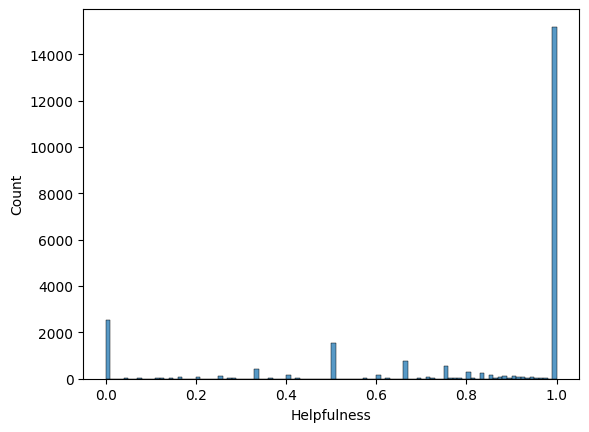

In [84]:
sns.histplot(data = df_cluster0[df_cluster0.Helpfulness <=1], x = 'Helpfulness', binwidth = 0.01)

<AxesSubplot: xlabel='Helpfulness', ylabel='Count'>

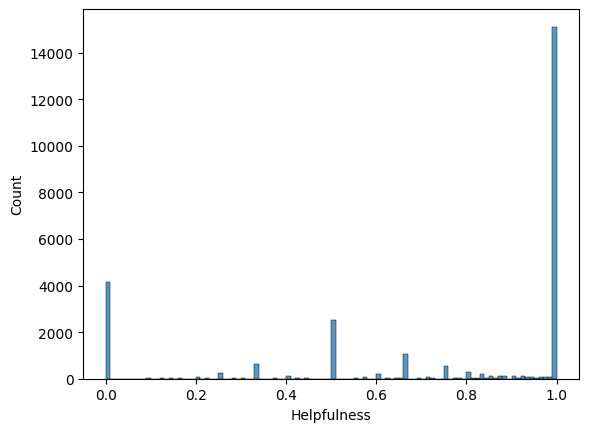

In [85]:
sns.histplot(data = df_cluster1[df_cluster1.Helpfulness <=1], x = 'Helpfulness', binwidth = 0.01)

<AxesSubplot: xlabel='Helpfulness', ylabel='Count'>

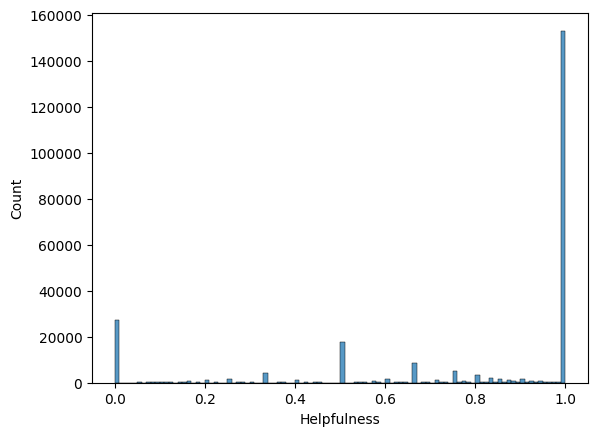

In [86]:
sns.histplot(data = df_cluster2[df_cluster2.Helpfulness <=1], x = 'Helpfulness', binwidth = 0.01)

In [93]:
df_cluster0 = df_cluster0[(df_cluster0.Helpfulness <=1) & (df_cluster0.Helpfulness >=0.8) & (df_cluster0.HelpfulnessDenominator >=10)]
df_cluster0.describe()

,index,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,cluster_label,Helpfulness,kmeans
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1.049000e+03,1049.0,1049.000000,1049.0
mean,288638.937083,288639.937083,18.709247,19.741659,4.453765,1.233807e+09,0.0,0.943885,0.0
std,166293.140317,166293.140317,28.841835,29.412650,1.094751,5.838618e+07,0.0,0.059640,0.0
min,804.000000,805.000000,8.000000,10.000000,1.000000,1.038010e+09,0.0,0.800000,0.0
25%,128596.000000,128597.000000,10.000000,11.000000,4.000000,1.179187e+09,0.0,0.909091,0.0
50%,299499.000000,299500.000000,13.000000,14.000000,5.000000,1.234656e+09,0.0,0.947368,0.0
75%,444655.000000,444656.000000,18.000000,20.000000,5.000000,1.282954e+09,0.0,1.000000,0.0
max,566650.000000,566651.000000,580.000000,593.000000,5.000000,1.350605e+09,0.0,1.000000,0.0


In [94]:
df_cluster1 = df_cluster1[(df_cluster1.Helpfulness <=1) & (df_cluster1.Helpfulness >=0.8) & (df_cluster1.HelpfulnessDenominator >=10)]
df_cluster1.describe()

,index,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,cluster_label,Helpfulness,kmeans
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1.488000e+03,1488.0,1488.000000,1488.0
mean,297415.430108,297416.430108,39.102823,40.690188,4.389113,1.260747e+09,1.0,0.946598,1.0
std,165690.099648,165690.099648,74.554518,75.546670,1.157910,5.581520e+07,0.0,0.057833,0.0
min,2380.000000,2381.000000,8.000000,10.000000,1.000000,1.036109e+09,1.0,0.800000,1.0
25%,148444.750000,148445.750000,12.000000,12.000000,4.000000,1.232431e+09,1.0,0.910714,1.0
50%,293141.500000,293142.500000,17.000000,19.000000,5.000000,1.270426e+09,1.0,0.964286,1.0
75%,453389.500000,453390.500000,33.000000,35.000000,5.000000,1.302134e+09,1.0,1.000000,1.0
max,568124.000000,568125.000000,559.000000,562.000000,5.000000,1.347408e+09,1.0,1.000000,1.0


In [95]:
df_cluster2 = df_cluster2[(df_cluster2.Helpfulness <=1) & (df_cluster2.Helpfulness >=0.8) & (df_cluster2.HelpfulnessDenominator >=10)]
df_cluster2.describe()

,index,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,cluster_label,Helpfulness,kmeans
count,13795.000000,13795.000000,13795.000000,13795.000000,13795.000000,1.379500e+04,13795.0,13795.000000,13795.0
mean,285672.972309,285673.972309,22.284161,23.680029,4.088003,1.248126e+09,2.0,0.941656,2.0
std,161711.039962,161711.039962,30.787878,32.566613,1.452879,5.687737e+07,0.0,0.062654,0.0
min,32.000000,33.000000,8.000000,10.000000,1.000000,9.482400e+08,2.0,0.800000,2.0
25%,152678.500000,152679.500000,11.000000,11.000000,4.000000,1.206662e+09,2.0,0.900000,2.0
50%,285494.000000,285495.000000,14.000000,15.000000,5.000000,1.256602e+09,2.0,0.953846,2.0
75%,424475.500000,424476.500000,22.000000,23.000000,5.000000,1.294099e+09,2.0,1.000000,2.0
max,568436.000000,568437.000000,866.000000,923.000000,5.000000,1.349827e+09,2.0,1.000000,2.0


In [99]:
X = df_cluster0['Text']
pairs = [a for idx, a in enumerate(X) ]
pairs

["It looks pretty, but the contents are very minute and seem to not be of very high quality. There's a plastic cup for the tea that looks like it came from a dollar store. The basket is nice, though.",
 'I love drinking green tea.  It is delicious hot or cold, but being able to take it with me anywhere was key.  So I searched long and hard for an alternative to canned and bottled green tea which can be cumbersome, expensive and hard to come by in most parts of the US.  In the beginning, what I found was either too expensive, had sugar in it (which defeats the purpose of drinking green tea in the first place) or did not get very good reviews.  Then I found this product and quickly ordered it at the great price and free shipping.  I was pleasantly surprised.<br /><br />The product works as advertised.  It dissolves quickly in cold water making it great to carry anywhere and it tastes great too.  The instructions say to use one packet for 8 ounces of water, but actually it should be used 

In [100]:
y = df_cluster1['Text']
pairs = [a for idx, a in enumerate(y) ]
pairs

['This coffee has a smooth, carmely, dark finish that I love! My husband gets other dark blends that taste like charcoal to me. This one is very smooth, with just a hint of sweetness. I wish that Amazon had it on its monthly purchase program, would love to save 15% on it! However, I was glad to find it someplace besides Green Mountain. As prime members, we can get our coffee replaced in 2 shipping days v. a week or longer over at GM. Sweet!',
 'Great coffee.  Rich, robust.  A coffee-lovers choice.  If you like French roast or Italian roast, you will like this coffee.',
 'The Melitta Java Pods Have a slightly smaller circumference than the Senseo pods and are thicker. If you are using a Senseo coffee machine, you probably should moisten the Java pod and smooth it before attempting to latch the lid. Otherwise, you risk breaking the latching mechanism. The resulting decaf coffee is not bad and seems to this reviewer to have a richer taste than the Senseo decaf pods. The Melitta Java pods 

In [101]:
z = df_cluster2['Text']
pairs = [a for idx, a in enumerate(z) ]
pairs

["McCann's Instant Oatmeal is great if you must have your oatmeal but can only scrape together two or three minutes to prepare it. There is no escaping the fact, however, that even the best instant oatmeal is nowhere near as good as even a store brand of oatmeal requiring stovetop preparation.  Still, the McCann's is as good as it gets for instant oatmeal. It's even better than the organic, all-natural brands I have tried.  All the varieties in the McCann's variety pack taste good.  It can be prepared in the microwave or by adding boiling water so it is convenient in the extreme when time is an issue.<br /><br />McCann's use of actual cane sugar instead of high fructose corn syrup helped me decide to buy this product.  Real sugar tastes better and is not as harmful as the other stuff. One thing I do not like, though, is McCann's use of thickeners.  Oats plus water plus heat should make a creamy, tasty oatmeal without the need for guar gum. But this is a convenience product.  Maybe the 

## Topic Modelling

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

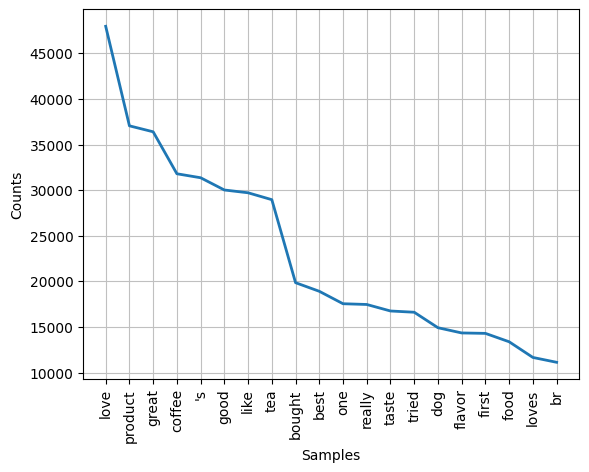

[('love', 47961), ('product', 37050), ('great', 36396), ('coffee', 31796), ("'s", 31359), ('good', 30017), ('like', 29711), ('tea', 28955), ('bought', 19856), ('best', 18912), ('one', 17549), ('really', 17467), ('taste', 16753), ('tried', 16616), ('dog', 14919), ('flavor', 14346), ('first', 14299), ('food', 13379), ('loves', 11661), ('br', 11129)]


In [7]:
# Change 'sentence' column data type from object to string
words = df['Text'].to_string()
text_lower = words.lower()
# Only tokenized words that contain lower case letters, as imporatnt words are more likely to be specific nouns. 
tokenized_words=word_tokenize(text_lower)

import string
from nltk.corpus import stopwords
#stopwords "english" contains many subjective and objective words such as 'i', 'myself' and 'you'.
stop_words=stopwords.words("english")
print(stop_words)
# Adding more unnecessary words into stop_words. 
stop_words.extend(["get","need", "s", "a", "the", "I", "What", "Is", "How", "n't", "Will", "Can", "Does", "Are", "If", "The", "'ve", "'m", "j", "th", "go",])

filtered_tokens = []
for i in tokenized_words:
  if i not in stop_words:
    filtered_tokens.append(i)

# punctuations, which contain '?', '' and '!'
punctuations=list(string.punctuation)
#Add custom punctuations to the list
punctuations.append("...")
punctuations.append("?")

#Create a variable that include all filtered tokenized words. 
filtered_tokens_final=[]
for i in filtered_tokens:
    if i not in punctuations:
        filtered_tokens_final.append(i)

all_words=nltk.FreqDist(filtered_tokens_final)
all_words.plot(20);
print(all_words.most_common(20))


In [8]:
filtered_tokens_final2 = [filtered_tokens_final]


# Topic modelling
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
dictionary = gensim.corpora.Dictionary(filtered_tokens_final2)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokens_final2]

# Build LDA model
num_topics = 5
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.001*"great" + 0.000*"love" + 0.000*"product" + 0.000*"'s" + 0.000*"tea" + 0.000*"like" + 0.000*"coffee" + 0.000*"good" + 0.000*"bought" + 0.000*"one"

Topic: 1 
Words: 0.001*"love" + 0.001*"great" + 0.001*"product" + 0.001*"coffee" + 0.001*"'s" + 0.001*"like" + 0.001*"good" + 0.001*"bought" + 0.001*"tea" + 0.001*"taste"

Topic: 2 
Words: 0.001*"love" + 0.001*"product" + 0.001*"'s" + 0.000*"like" + 0.000*"great" + 0.000*"good" + 0.000*"tea" + 0.000*"coffee" + 0.000*"flavor" + 0.000*"bought"

Topic: 3 
Words: 0.001*"love" + 0.000*"great" + 0.000*"product" + 0.000*"'s" + 0.000*"tea" + 0.000*"bought" + 0.000*"coffee" + 0.000*"good" + 0.000*"like" + 0.000*"best"

Topic: 4 
Words: 0.016*"love" + 0.012*"product" + 0.012*"great" + 0.011*"coffee" + 0.011*"'s" + 0.010*"good" + 0.010*"like" + 0.010*"tea" + 0.007*"bought" + 0.006*"best"

